# Regressão linear

In [17]:
import functools
from math import sqrt

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import statsmodels.api as sm 
import scipy.stats as sct
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Trade-off viés-variância

$$\mathbb{E}[(f(x) - \hat{f}(x))^{2}] = \underbrace{\text{Bias}(\hat{f}(x))^{2}}_{\text{viés}} + \underbrace{\text{Var}[\hat{f}(x)]}_{\text{variância}} + \underbrace{\varepsilon^{2}}_{\text{erro irredutível}}$$

In [18]:
boston_dataset = load_boston()

#O Dataset não vêm no formato de DataFrame, que estranho. Então pegamos os dados através de boston_data.set.data
boston_features = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
boston_target = pd.DataFrame(boston_dataset.target, columns = ['Price'])

boston = pd.concat([boston_features, boston_target], axis = 1)


In [19]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


#### Descrição do dataset:

In [20]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Divisão da base de dados em treino e teste

In [21]:
#Já parou para pensar porque utilizam tanto o número 42 como random_state?
train_features, test_features, train_target, test_target = train_test_split(boston_features, boston_target, test_size = 0.2, random_state = 42)

In [22]:
linear_regression = LinearRegression()

linear_regression.fit(train_features, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
linear_regression.coef_

array([[-1.13055924e-01,  3.01104641e-02,  4.03807204e-02,
         2.78443820e+00, -1.72026334e+01,  4.43883520e+00,
        -6.29636221e-03, -1.44786537e+00,  2.62429736e-01,
        -1.06467863e-02, -9.15456240e-01,  1.23513347e-02,
        -5.08571424e-01]])

In [24]:
linear_regression.score

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>

### Predição

In [25]:
predict_test = linear_regression.predict(test_features)

In [26]:
r2_test = r2_score(test_target, predict_test); r2_test

0.6687594935356329

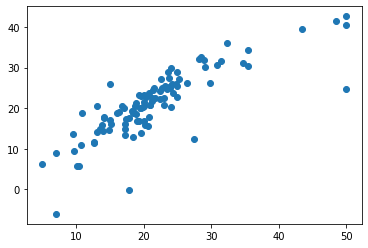

In [27]:
plt.scatter(test_target, predict_test)

# Ridge

In [86]:
from sklearn.preprocessing import StandardScaler

In [91]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()

scaled_features = scaler_x.fit_transform(boston_features)
scaled_target = scaler_y.fit_transform(boston_target)

In [92]:
#Já parou para pensar porque utilizam tanto o número 42 como random_state?
train_features, test_features, train_target, test_target = train_test_split(scaled_features, scaled_target, test_size = 0.2, random_state = 42)

In [93]:
ridge_regression = Ridge(alpha=1, solver ='cholesky')

ridge_regression.fit(train_features, train_target)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)

#### Valores dos coeficientes utilizando ridge regression é próximo de zero, justamente porque ele torna o modelo menos sensível aos dados, reduzindo a variância ao introduzir o bias do $\lambda x \beta^{2}$

In [30]:
ridge_regression.coef_

array([[-0.99218679,  0.6777488 ,  0.2522143 ,  0.72248078, -1.99083465,
         3.15157218, -0.17726162, -3.04502895,  2.17324941, -1.69555879,
        -2.02783351,  1.127197  , -3.59897667]])

In [94]:
r2_score(test_target, ridge_regression.predict(test_features))

0.6684401592810273

## Lasso

In [95]:
from sklearn.model_selection import GridSearchCV

In [105]:
lasso_params = {'alpha':[0.1,0.2,0.3,5,6,1,2,3,4]}

In [106]:
lasso_regression = Lasso()

In [107]:
lasso_regression

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [108]:
#Instanciando o GridSearchCV
grid = GridSearchCV(lasso_regression, 
                    param_grid=lasso_params,
                   n_jobs = -1) #n_jobs = -1 significa que vai utilizar todos processadores, se fosse 1 utilizaria só um processador

In [109]:
history = grid.fit(train_features, train_target)

In [110]:
history

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.1, 0.2, 0.3, 5, 6, 1, 2, 3, 4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [111]:
history.best_estimator_

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [112]:
pd.DataFrame(history.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001151,0.000193,0.000968,0.000114,0.1,{'alpha': 0.1},0.690120,0.590747,0.680729,0.722714,0.622504,0.661363,0.047880,1
1,0.000819,0.000138,0.000707,0.000115,0.2,{'alpha': 0.2},0.630994,0.562212,0.635125,0.631715,0.577528,0.607515,0.031147,2
2,0.000721,0.000075,0.000546,0.000028,0.3,{'alpha': 0.3},0.548443,0.504032,0.564836,0.526502,0.510799,0.530923,0.022824,3
3,0.000742,0.000144,0.000750,0.000127,5,{'alpha': 5},-0.016673,-0.005895,-0.000150,-0.009900,-0.007144,-0.007953,0.005396,4
4,0.000823,0.000156,0.000653,0.000173,6,{'alpha': 6},-0.016673,-0.005895,-0.000150,-0.009900,-0.007144,-0.007953,0.005396,4
5,0.000620,0.000142,0.000552,0.000142,1,{'alpha': 1},-0.016673,-0.005895,-0.000150,-0.009900,-0.007144,-0.007953,0.005396,4
6,0.000632,0.000124,0.000555,0.000104,2,{'alpha': 2},-0.016673,-0.005895,-0.000150,-0.009900,-0.007144,-0.007953,0.005396,4
7,0.000698,0.000129,0.000622,0.000150,3,{'alpha': 3},-0.016673,-0.005895,-0.000150,-0.009900,-0.007144,-0.007953,0.005396,4
8,0.000784,0.000116,0.000565,0.000085,4,{'alpha': 4},-0.016673,-0.005895,-0.000150,-0.009900,-0.007144,-0.007953,0.005396,4


In [113]:
history.score

<bound method BaseSearchCV.score of GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.1, 0.2, 0.3, 5, 6, 1, 2, 3, 4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)>

In [119]:
lasso_best = Lasso(alpha = 0)

lasso_best.fit(train_features, train_target)

r2_score(test_target, lasso_best.predict(test_features))

/home/vitor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
/home/vitor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/vitor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51.7837995744121, tolerance: 0.04157431849510093
  positive)


0.6687594935356316